<a href="https://colab.research.google.com/github/garretbassett/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Garret_Bassett_DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).

In [52]:
#IMPORT STATEMENTS

import pandas as pd
import numpy as np

# READ CSV, ADD COLUMN NAMES

crx = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
                 , names = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10'
                            ,'A11','A12','A13','A14','A15','A16'])
print(crx.shape)
crx.head()

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


It looks like the shape is correct. The documentation only cites 15, but there are clearly 16 listed. I guess one of them isn't technically an attribute. Maybe `A16` or `A1`?




- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na

In [53]:
crx = crx.replace({'?': np.nan})

crx.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [54]:
# crx.info()

cont_cols = ['A2','A3','A8','A11','A14','A15']
cat_cols = ['A1','A4','A5','A6','A7','A9','A10','A11','A12','A13']

for col in cont_cols:
    crx[col] = crx[col].astype('float')

crx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null float64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null float64
A15    690 non-null float64
A16    690 non-null object
dtypes: float64(6), object(10)
memory usage: 86.3+ KB


In [0]:
crx = crx.dropna()

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

1. For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

2. For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

3. There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

#1

In [0]:
#IMPORT STATEMENTS

import matplotlib.pyplot as plt
from scipy import stats



A2


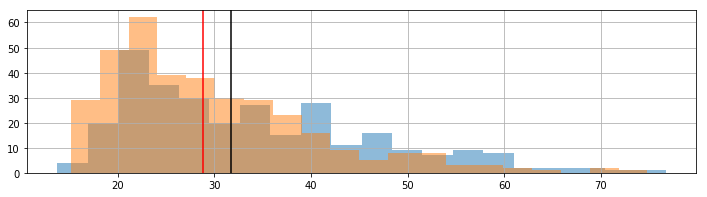

T-STAT:  1.8764084587517613
P-VAL:  0.06207042872835863


A3


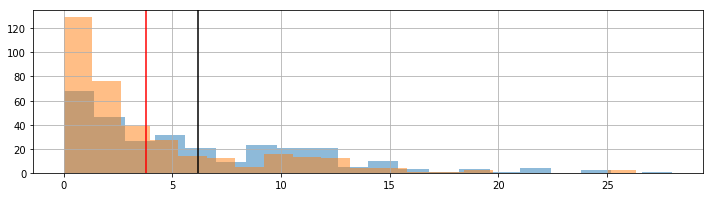

T-STAT:  3.4569081394125307
P-VAL:  0.000668677798306419


A8


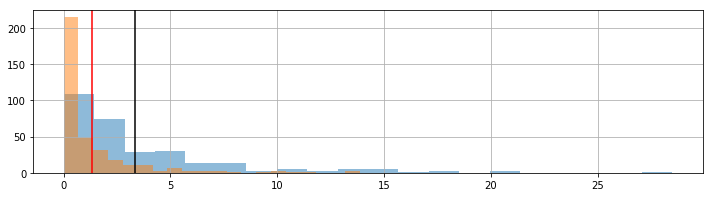

T-STAT:  4.757036043746497
P-VAL:  3.7796450640116825e-06


A11


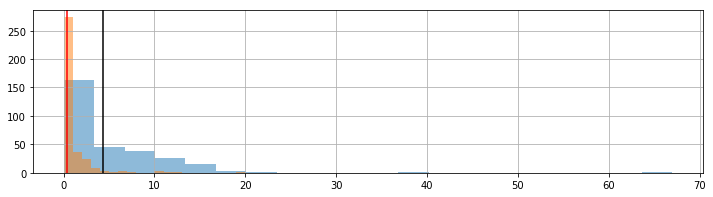

T-STAT:  7.4769595156935855
P-VAL:  2.408254220473218e-12


A14


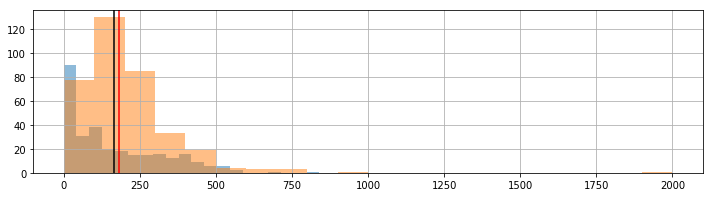

T-STAT:  -0.6398880066459162
P-VAL:  0.5229851306773339


A15


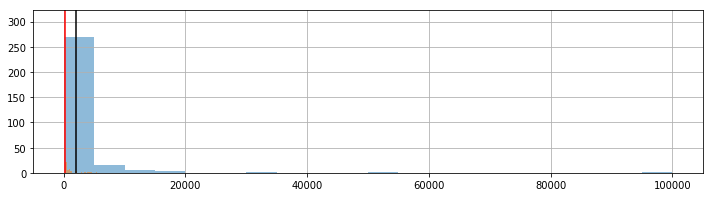

T-STAT:  3.3439121709626733
P-VAL:  0.0009878987963798914


In [160]:
for col in cont_cols:
    fig = plt.figure(figsize=(12,3))
    ax = fig.add_subplot()
    crx.groupby('A16')[col].hist(bins=20, alpha=.5)
    
    pos_samp = crx[col][crx['A16'] == '+'].sample(100)
    neg_samp = crx[col][crx['A16'] == '-'].sample(100)
    
    plt.axvline(x=pos_samp.mean(), color='black')
    plt.axvline(x=neg_samp.mean(), color='red')
    
    tstat, pval = ttest_ind(pos_samp, neg_samp)
    
    print('\n')
    print(col)
    plt.show()
    print('T-STAT: ', tstat)
    print('P-VAL: ', pval)
    i += 1

Several features are quite distinct across class labels. For this sample, **`A8`** is the most distinct feature.

What is surprising to me is that **`A14`** is one of the most visually distinct charts, but consistently has a p-value of > 0.05.

#2

First, chi-square test on one variable. I'll do it manually.

In [128]:
print(cat_cols)

# 1. CREATE CONTINGENCY TABLE

contingency_table = pd.crosstab(crx['A16'], crx['A7'], margins=True)
contingency_table

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A11', 'A12', 'A13']


A7,bb,dd,ff,h,j,n,o,v,z,All
A16,,,,,,,,,,
+,24,2,8,87,3,2,1,163,6,296
-,29,4,46,50,5,2,1,218,2,357
All,53,6,54,137,8,4,2,381,8,653


In [129]:
# 2. CALCULATE EXPECTED VALUES

row_sums = contingency_table.iloc[0:2, 9]
col_sums = contingency_table.iloc[2, 0:9]
total = contingency_table.loc['All','All']

expected = []
for x in range(len(row_sums)):
    expected_row = []
    for y in col_sums:
        exp_val = y * (row_sums[x] / total)
        expected_row.append(exp_val)
    expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)
expected

(2, 9)


array([[ 24.0245023 ,   2.71975498,  24.47779479,  62.10107198,
          3.62633997,   1.81316998,   0.90658499, 172.70444104,
          3.62633997],
       [ 28.9754977 ,   3.28024502,  29.52220521,  74.89892802,
          4.37366003,   2.18683002,   1.09341501, 208.29555896,
          4.37366003]])

In [141]:
# 3. CHI SQUARE TEST

observed = pd.crosstab(crx['A16'], crx['A7']).values

chi_square = ((observed - expected)**2 / (expected)).sum()
pval = 1 - stats.chi2.cdf(chi_square, len(expected_row) - 1)
print('CHI-2: ', chi_square)
print('P-VAL: ', pval)

CHI-2:  42.988254470828515
P-VAL:  8.829142689181779e-07


P-value is fine. Test stat seems low, but it's hard to tell without comparing. Now I'll run a loop to test all categorical variables.

In [124]:
for col in cat_cols:

    observed = pd.crosstab(crx['A16'], crx[col]).values

    chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
    print(col)
    print('CHI-2: ', chi_squared)
    print('P-VAL: ', p_value)
    print('\n')

A1
CHI-2:  0.17764082160253514
P-VAL:  0.6734085695133722


A4
CHI-2:  21.78325079317282
P-VAL:  1.8613463470618034e-05


A5
CHI-2:  21.78325079317282
P-VAL:  1.8613463470618034e-05


A6
CHI-2:  89.76481160702343
P-VAL:  1.5500154549498966e-13


A7
CHI-2:  42.988254470828515
P-VAL:  8.829142688919391e-07


A9
CHI-2:  353.4827159410316
P-VAL:  7.391616628555818e-79


A10
CHI-2:  131.50867232095965
P-VAL:  1.9163536191857147e-30


A11
CHI-2:  190.8992565752841
P-VAL:  6.795432610224608e-29


A12
CHI-2:  1.4379377134356208
P-VAL:  0.23047335495661603


A13
CHI-2:  6.756491933104269
P-VAL:  0.03410722751542202




Most columns have p-values well below the threshold for rejecting the null hypothesis. **`A9`** has the lowest p-value, but also has the highest test statistic. I don't think the high test stat is relevant here independent of the p-value.

**`A13`** has the lowest test stat while maintaining a p-value of below 0.05; however, I *think* the indicator of best fit is the p-value, not the test stat.

Meanwhile, **`A1`** and **`A12`** have a large p-value, indicating that they are likely independent of the class label.

I would love to have a way to visualize these relationships, but am not finding anything.

#3

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

- **T-tests.** The t-tests I ran indicate that **`A14`** is least likely to have a relationship with class labels, while the means all other categorical variables were significantly different across class labels. This seems to indicate that the categorical variables were by and large correlated with class labels.

- **Chi-squared tests.** I saw a similar trend with my Chi-squared tests; all but two features (**`A1`** and **`A12`**) appear to be significantly correlated with class labels.

- **Challenges.** The most difficult part of statistical tests for me is knowing what my results mean. For example, I'm not totally sure the conclusions I drew from the above tests are correct. If they aren't, then the *opposite* conclusions are true.